# Logistic Regression

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
def data_process(fname):
    data=pd.read_csv(fname)
    train=data.sample(frac=0.7) 
    test=data.drop(train.index)
    return np.array(train.iloc[:,:-1].T),np.array(train.iloc[:,-1].T),np.array(test.iloc[:,:-1].T),np.array(test.iloc[:,-1].T)

In [43]:
class LogisticRegression:
    def __init__(self,nof):
        self.W = np.random.uniform(low=0.0, high=1.0, size=nof)
        self.b = 0.
        self.nof=nof
    def sigmoid(self,X):
        sgm=[]
        for x in X:
            if x >= 0:
                z = np.exp(-x)
                sgm.append(1 / (1 + z))
            else:
                z = np.exp(x)
                sgm.append(z / (1 + z))
        return np.array(sgm)
    def E(self,x,y):
        z=x.T@self.W+self.b
        ycap=self.sigmoid(z)
        e1=0
        e2=0
        for i in range(x.shape[1]):
            if(ycap[i]!=0):
                e1-=y[i]*np.log(ycap[i])
            if(ycap[i]!=1):
                e2-=(1-y[i])*np.log(1-ycap[i])
            
        e=(e1+e2)
        return e
    def fit_sgd(self, X, y, ni,lr,eps,freq):
        N = X.shape[1]
        error=[]
        acc=[]
        epr=0
        i=0
        e=0
        a=0
        x=0
        acc.append(0)
        for n in range(ni):
            for i in range(N):
                x+=1
                z=X.T@self.W+self.b
                ycap = self.sigmoid(z)
                self.W+= lr * X[:,i]*(y[i]-ycap[i])
                self.b+=lr*(y[i]-ycap[i])
                if(ycap[i]==0):
                    e=-1*((1-y[i])*np.log(1-ycap[i]))
                elif(ycap[i]==1):
                    e=-1*(y[i]*np.log(ycap[i]))
                else:
                    e=-1*((y[i]*np.log(ycap[i]))+(1-y[i])*np.log(1-ycap[i]))
                a=(1-np.mean(np.abs(ycap-y)))*100
                if(e-epr<=eps and x>1):
                    break
                epr=e
                if x%50==0:
                    acc.append(a)
                    error.append(e)
            
        return error,acc,self.W
        
    def fit_gd(self, X, y, epochs,lr,eps,freq): 
        error=[]
        acc=[]
        epr=0
        a=0
        for n in range(epochs):
            z=X.T@self.W+self.b
            ycap = self.sigmoid(z)
            self.W -= lr *(X@(ycap-y))
            self.b-=lr*np.sum(ycap-y)
            e=self.E(X, y)
            a=(1-np.mean(np.abs(ycap-y)))*100
            if(n%freq==0):
                error.append(e)
                acc.append(a)
            if(e-epr<=eps and n>1):
                    break
            epr=e
        return error,acc,self.W
            
    def predict(self,x_test):
        z = x_test.T @ self.W+self.b
        y=self.sigmoid(z)
        y[y >=0.5] = 1
        y[y <0.5] = 0
        return y

In [44]:
def evaluate(Y_train,Y_prediction_train,Y_test,Y_prediction_test):
    ic=np.abs(Y_prediction_train - Y_train)
    tp=len(np.where(Y_prediction_train + Y_train==2)[0])
    tn=len(np.where(Y_prediction_train + Y_train==0)[0])
    fp=len(np.where(Y_prediction_train - Y_train==-1)[0])
    fn=len(np.where(Y_prediction_train - Y_train==1)[0])
    
    tp1=len(np.where(Y_prediction_test + Y_test==2)[0])
    tn1=len(np.where(Y_prediction_test + Y_test==0)[0])
    fp1=len(np.where(Y_prediction_test - Y_test==-1)[0])
    fn1=len(np.where(Y_prediction_test - Y_test==1)[0])
    
    a=(tp+tn)/(tp+tn+fp+fn)
    p=tp/(tp+fp)
    r=tp/(tp+fn)
    f=2*p*r/(p+r)
    
    a1=(tp1+tn1)/(tp1+tn1+fp1+fn1)
    p1=tp1/(tp1+fp1)
    r1=tp1/(tp1+fn1)
    f1=2*p1*r1/(p1+r1)
    return a,a1,f,f1,r,r1,p,p1

In [45]:
fname="/Users/durbasatpathi/Documents/ml/a2/dataset_LR.csv"
df=pd.read_csv(fname)
nof=df.shape[1]-1
lr=[0.001,0.05,0.1]
emain1=[]
acmain1=[]
for l in lr:
    print(l)
    train_acc=[]
    test_acc=[]
    error=[]
    acc=[]
    train_f=[]
    test_f=[]
    train_p=[]
    test_p=[]
    train_r=[]
    test_r=[]

    for i in range(10):
        print("Split "+ str(i+1) +": ")
        X_train,y_train,X_test,y_test=data_process("/Users/durbasatpathi/Documents/ml/a2/dataset_LR.csv")
        model=LogisticRegression(nof)
        e,a,w=model.fit_sgd(X_train,y_train,100,l,0.00001,50)
        error.append(e)
        y_pred_tst=model.predict(X_test)
        y_pred_tr=model.predict(X_train)
        tr_acc,tst_acc,tr_f,tst_f,tr_r,tst_r,tr_p,tst_p=evaluate(y_train,y_pred_tr,y_test,y_pred_tst)
        print("w",w)
        train_acc.append(tr_acc)
        test_acc.append(tst_acc)
        train_f.append(tr_f)
        test_f.append(tst_f)
        train_p.append(tr_p)
        test_p.append(tst_p)
        train_r.append(tr_r)
        test_r.append(tst_r)
        if(i==9):
            emain1.append(e)
            acmain1.append(a)

    print(f"Overall Training Accuracy = {np.mean(train_acc)}")
    print(f"Overall Test Accuracy = {np.mean(test_acc)}")
    print(f"Overall Training f = {np.mean(train_f)}")
    print(f"Overall Test f = {np.mean(test_f)}")
    print(f"Overall Training p = {np.mean(train_p)}")
    print(f"Overall Test p = {np.mean(test_p)}")
    print(f"Overall Training r = {np.mean(train_r)}")
    print(f"Overall Test r = {np.mean(test_r)}")

0.001
Split 1: 
w [-2.13426255 -1.26829613 -1.46222526 -0.18524486]
Split 2: 
w [-2.1027553  -1.24287091 -1.44510083 -0.1861075 ]
Split 3: 
w [-2.15349043 -1.27752984 -1.45586608 -0.20914026]
Split 4: 
w [-2.13901133 -1.24104287 -1.43608158 -0.20588783]
Split 5: 
w [-2.09575641 -1.23185865 -1.44853352 -0.21739425]
Split 6: 
w [-2.14310142 -1.21449028 -1.42612664 -0.25939844]
Split 7: 
w [-2.13496558 -1.21572536 -1.43138748 -0.12757219]
Split 8: 
w [-2.07733489 -1.242291   -1.41853142 -0.23137933]
Split 9: 
w [-2.14393644 -1.27188688 -1.46189096 -0.22520505]
Split 10: 
w [-2.12688343 -1.25205125 -1.44973963 -0.18770394]
Overall Training Accuracy = 0.9881250000000001
Overall Test Accuracy = 0.9893203883495147
Overall Training f = 0.9866016198874684
Overall Test f = 0.9883377702203913
Overall Training p = 0.9893932992204977
Overall Test p = 0.9931315745491573
Overall Training r = 0.983827384118498
Overall Test r = 0.983597663992362
0.05
Split 1: 
w [-7.03243091 -3.84079579 -4.72570092 -0.

In [100]:
ep1=[]
ep2=[]
ep3=[]
ap1=[]
ap2=[]
ap3=[]
for i in range(len(emain1[0])):
    if i%35==0:
        ep1.append(emain1[0][i])
        ep2.append(emain1[1][i])
        ep3.append(emain1[2][i])
        ap1.append(acmain1[0][i])
        ap2.append(acmain1[1][i])
        ap3.append(acmain1[2][i])

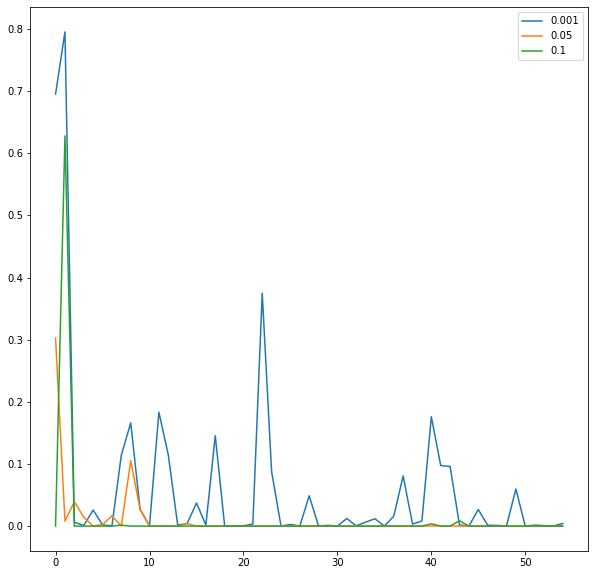

In [101]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))

y=np.array(ep1)
plt.plot(y)
y=np.array(ep2)
plt.plot(y)
y=np.array(ep3)
plt.plot(y)
plt.legend(["0.001","0.05","0.1"], loc ="upper right")
plt.show()

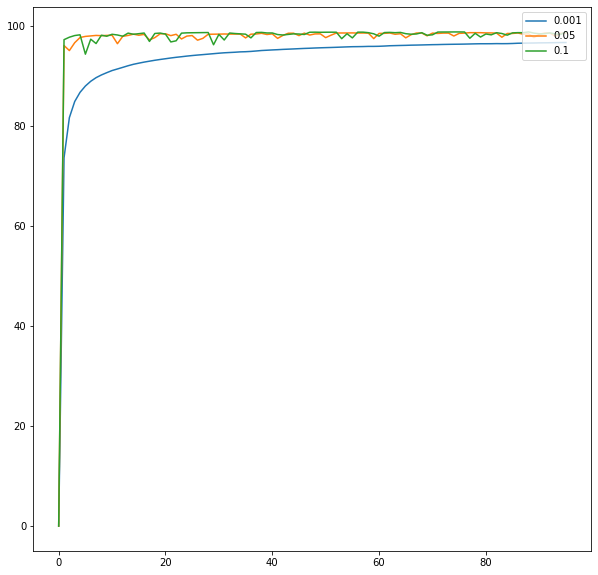

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))

y=np.array(ap1)
plt.plot(y)
y=np.array(ap2)
plt.plot(y)
y=np.array(ap3)
plt.plot(y)
plt.legend(["0.001","0.05","0.1"], loc ="upper right")
plt.show()

In [39]:
fname="/Users/durbasatpathi/Documents/ml/a2/dataset_LR.csv"
df=pd.read_csv(fname)
nof=df.shape[1]-1
lr=[0.001,0.05,0.1]
emain=[]
acmain=[]
for l in lr:
    print(l)
    train_acc=[]
    test_acc=[]
    error=[]
    acc=[]
    train_f=[]
    test_f=[]
    train_p=[]
    test_p=[]
    train_r=[]
    test_r=[]
    for i in range(10):
        print("Split "+ str(i+1) +": ")
        X_train,y_train,X_test,y_test=data_process("/Users/durbasatpathi/Documents/ml/a2/dataset_LR.csv")
        model=LogisticRegression(nof)
        e,a,w=model.fit_gd(X_train,y_train,1000,l,0.00001,50)
        if(i==5):
            emain.append(e)
            acmain.append(a)
        y_pred_tst=model.predict(X_test)
        y_pred_tr=model.predict(X_train)
        tr_acc,tst_acc,tr_f,tst_f,tr_r,tst_r,tr_p,tst_p=evaluate(y_train,y_pred_tr,y_test,y_pred_tst)
        print("w",w)
        train_acc.append(tr_acc)
        test_acc.append(tst_acc)
        train_f.append(tr_f)
        test_f.append(tst_f)
        train_p.append(tr_p)
        test_p.append(tst_p)
        train_r.append(tr_r)
        test_r.append(tst_r)
    print(f"Overall Training Accuracy = {np.mean(train_acc)}")
    print(f"Overall Test Accuracy = {np.mean(test_acc)}")
    print(f"Overall Training f = {np.mean(train_f)}")
    print(f"Overall Test f = {np.mean(test_f)}")
    print(f"Overall Training p = {np.mean(train_p)}")
    print(f"Overall Test p = {np.mean(test_p)}")
    print(f"Overall Training r = {np.mean(train_r)}")
    print(f"Overall Test r = {np.mean(test_r)}")

0.001
Split 1: 
w [-4.18625921 -2.28075543 -2.82742649 -0.27085309]
Split 2: 
w [-3.84781644 -2.14716834 -2.63798354 -0.14192108]
Split 3: 
w [-4.16204465 -2.25155395 -2.76242817 -0.16984259]
Split 4: 
w [-4.40430934 -2.3407075  -2.94015607 -0.16988489]
Split 5: 
w [-3.78825176 -2.22464724 -2.68663357 -0.31375312]
Split 6: 
w [-4.05246561 -2.18992581 -2.70356685 -0.2009997 ]
Split 7: 
w [-4.02081947 -2.36540236 -2.82920588 -0.3482759 ]
Split 8: 
w [-3.92671466 -2.23218661 -2.70950574 -0.2772438 ]
Split 9: 
w [-4.00284501 -2.2756874  -2.76883342 -0.38257109]
Split 10: 
w [-3.96052545 -2.29412648 -2.823156   -0.29241612]
Overall Training Accuracy = 0.9904166666666667
Overall Test Accuracy = 0.9885922330097088
Overall Training f = 0.9892812264361035
Overall Test f = 0.9870270076343486
Overall Training p = 0.9932142325355153
Overall Test p = 0.9918582849851967
Overall Training r = 0.9853827298132701
Overall Test r = 0.982323484676729
0.05
Split 1: 
w [-72.97234123 -38.89922454 -49.98405946

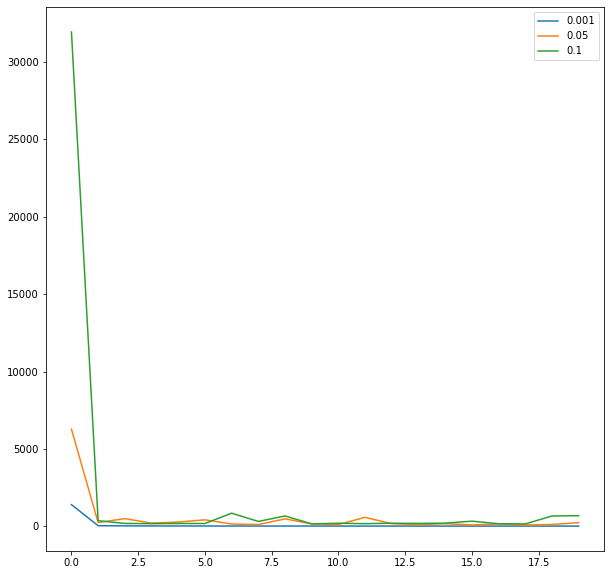

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
for i in range(3):
    y=np.array(emain[i]).squeeze()
    plt.plot(y)
plt.legend(["0.001","0.05","0.1"], loc ="upper right")
plt.show()

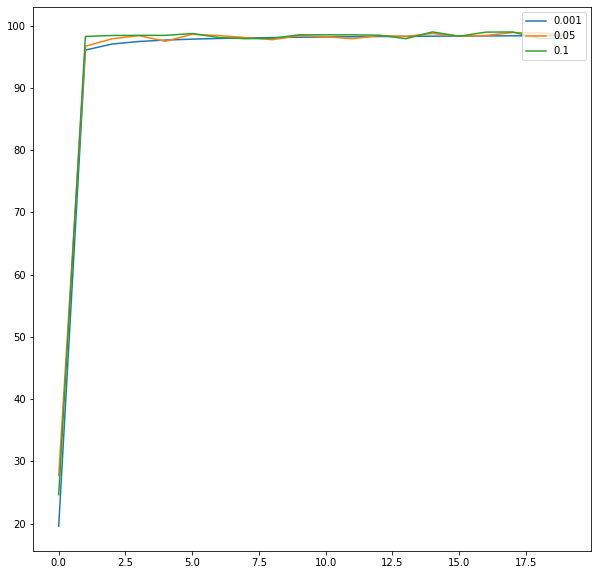

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
for i in range(3):
    y=np.array(acmain[i]).squeeze()
    plt.plot(y)
plt.legend(["0.001","0.05","0.1"], loc ="upper right")
plt.show()